In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

In [3]:
train=pd.read_csv("./desktop/house/train.csv")
test=pd.read_csv("./desktop/house/test.csv")
both = [train,test]

# Get data first impression

In [4]:
print(train.shape)
print("_"*40)
test.shape

(1460, 81)
________________________________________


(1459, 80)

In [5]:
print(train.info())
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA(Exploratory Data Analysis)

## Explore missing data
I will drop the variables with more than 45% missing values

In [6]:
for dataset in both:
    print(dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
nan_train = [feature for feature in train.columns if train[feature].isnull().sum() > 1]
nan_test =  [feature for feature in test.columns if test[feature].isnull().sum() > 1]

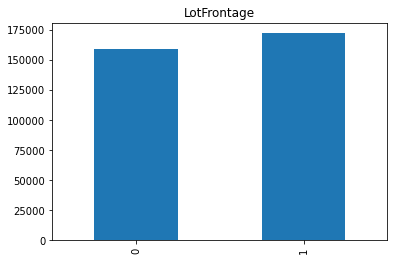

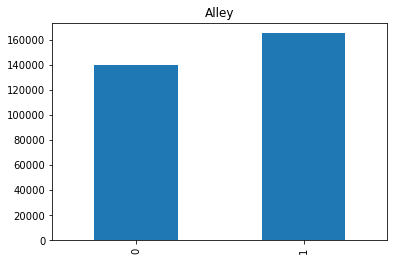

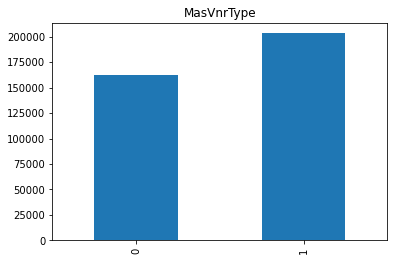

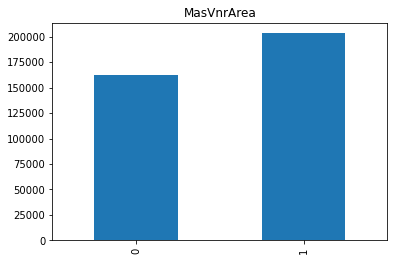

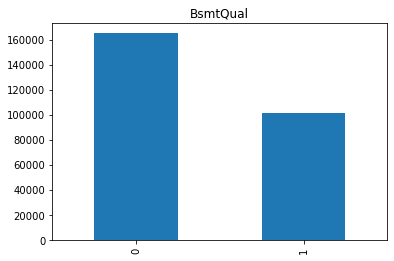

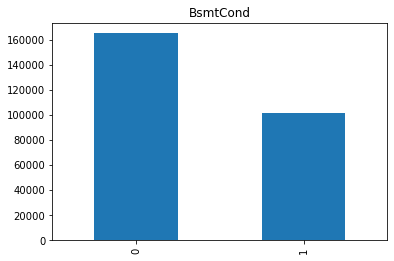

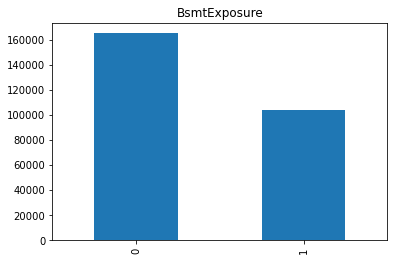

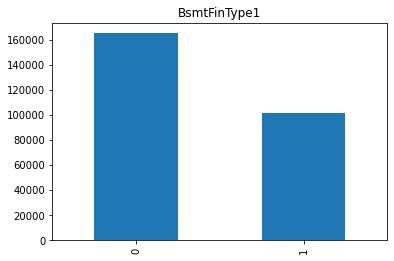

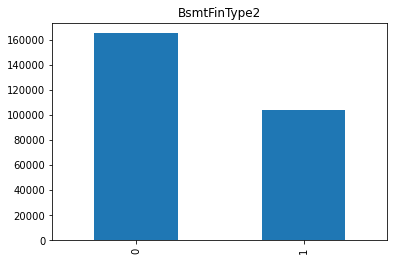

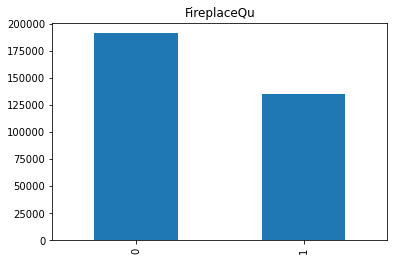

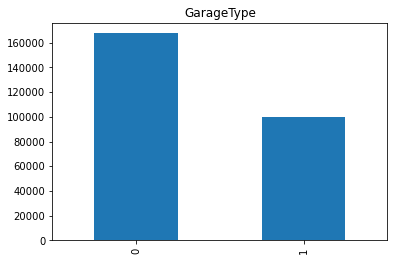

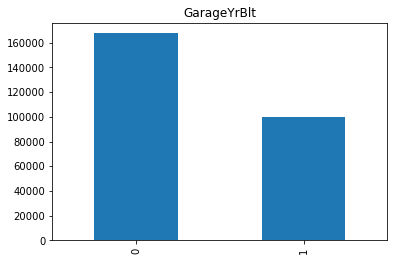

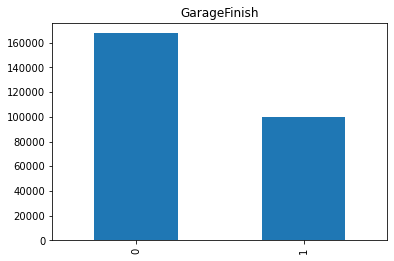

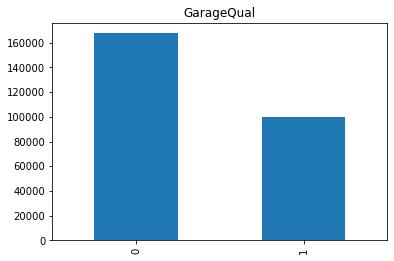

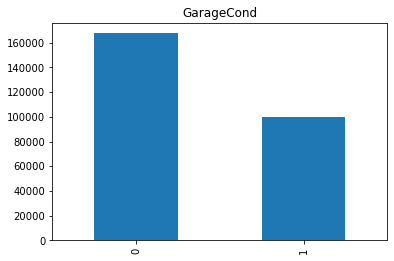

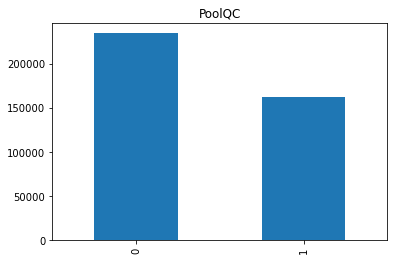

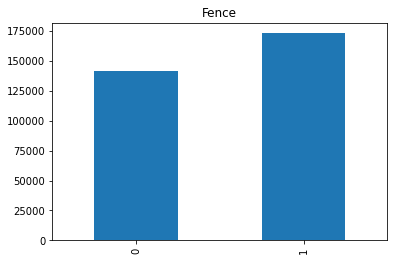

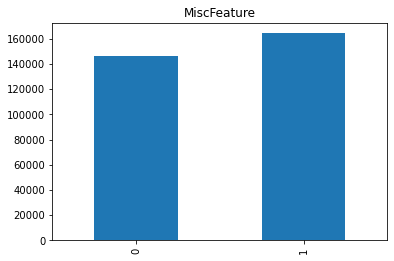

In [8]:
# Relationship between NaNs and Target Variable
for feature in nan_train:
    train.groupby(np.where(train[feature].isnull(),1,0))["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()
    

## Insights From analysis above
1- Houses with no Masonry veneer have higher saleprice.
2- Houses with no Basement have higher saleprice.
3- Houses with Garage have higher saleprice.
4- Houses with pool have higher saleprice.

In [9]:
# get the mean of missed values.
nan_train_percentage = [train[feature].isnull().mean() for feature in nan_train]
nan_test_percentage =  [test[feature].isnull().mean() for feature in nan_test]

In [12]:
# Create DF of both
#nan_train_percentage= pd.DataFrame({'feature':nan_train,"Percent of NaNs":nan_train_percentage})
nan_train_percentage = pd.DataFrame({'feature':nan_train,"Percent of NaNs":nan_train_percentage})

In [ ]:
nan_test

In [13]:
columns_to_drop_train = nan_train_percentage[nan_train_percentage["Percent of NaNs"] > 0.45]["feature"]

In [14]:
#drop NaNs columns
train = train.drop(columns_to_drop_train,axis=1)
# Drop same columns for test data
test = test.drop(columns_to_drop_train,axis=1)

In [51]:
nan_train_percentage

,feature,Percent of NaNs
0,LotFrontage,0.177397
1,Alley,0.937671
2,MasVnrType,0.005479
3,MasVnrArea,0.005479
4,BsmtQual,0.025342
5,BsmtCond,0.025342
6,BsmtExposure,0.026027
7,BsmtFinType1,0.025342
8,BsmtFinType2,0.026027
9,FireplaceQu,0.472603


# Dealing with less than %45 missing values.
now, i will explore every feature with NaNs, And figure out how to deal with it.

In [15]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [16]:
# Dealing with other missing data for further analysis.
#1- Garage based variables Except temporal variables like GarageYrBlt
Garage_na = [feature for feature in train.columns if train[feature].isnull().sum() > 1 and "Garage" in feature and "Yr" not in feature]

# based in the data discribtion NaNs in above variables mean that the house with no garage
for feature in Garage_na:
    train[feature]=train[feature].fillna("no_garage")
    test[feature] = test[feature].fillna('no_garage')

In [17]:
#2- Basement based variables.
basement_na = [feature for feature in train.columns if train[feature].isnull().sum()>1 and "Bsmt" in feature ]
# based in the data discribtion NaNs in above variables mean that the house with no Basement
for feature in basement_na:
    train[feature] = train[feature].fillna("no_basement")
    test[feature] = test[feature].fillna("no_basement")

In [18]:
#3-LotFrontage variable.
train["LotFrontage"]= train["LotFrontage"].fillna(train["LotFrontage"].median())
test["LotFrontage"]= test["LotFrontage"].fillna(test["LotFrontage"].median())

In [19]:
#4-GarageYearBlt variable
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["GarageYrBlt"].median())
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(test["GarageYrBlt"].median())

In [20]:
#5-Electrical Variable.
train["Electrical"]= train["Electrical"].fillna('SBrkr')

In [21]:
#6- MasVnrType variable
train["MasVnrType"] = train["MasVnrType"].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")

In [22]:
#7- MasVnrArea variable.
train["MasVnrArea"]=train["MasVnrArea"].fillna(0.0)
test["MasVnrArea"]=test["MasVnrArea"].fillna(0.0)

In [23]:
# Test Dataset has a little amount of NaNs, so it's okey to drop the entire row.
test = test.dropna(axis=0)

In [24]:
# Last Check.
print(train.isnull().sum())
print("_"*40)
print(test.isnull().sum())
print("Done.$$")

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
# Save the work we have did.
train.to_csv("train.csv")
test.to_csv("test.csv")

# Make some data visualizations to get insights.
first, i will split all features based on data types, then create visualizations to get insights.

In [175]:
train=pd.read_csv("train_feature.csv")
test = pd.read_csv("test_feature.csv")
train = train.drop("Unnamed: 0",axis=1)
test = test.drop("Unnamed: 0",axis=1)

In [97]:
# split features based on dtype
continues = [feature for feature in train.columns if train[feature].dtype != "O" and len(train[feature].unique()) > 25]
discrete = [feature for feature in train.columns if train[feature].dtype != "O" and len(train[feature].unique()) < 25]
categorical = [feature for feature in train.columns if train[feature].dtype == "O"]

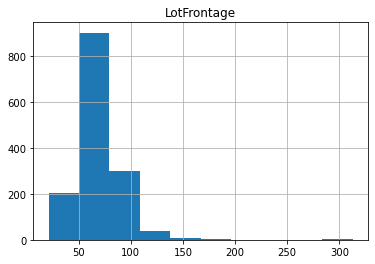

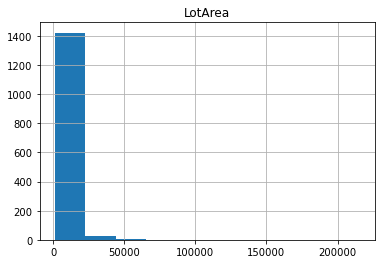

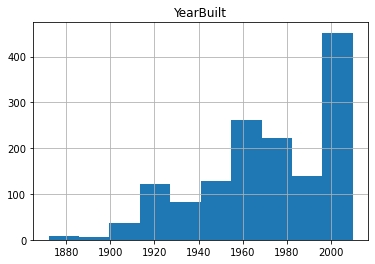

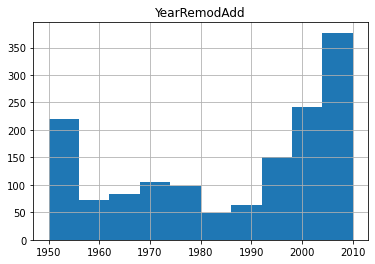

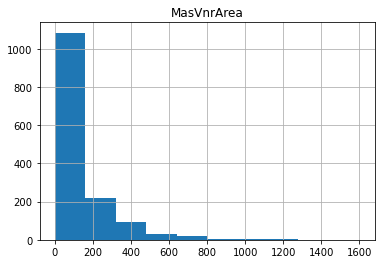

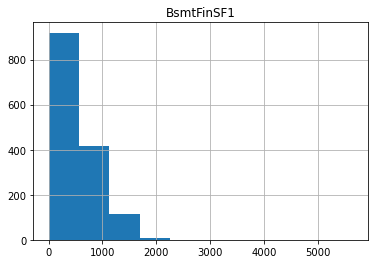

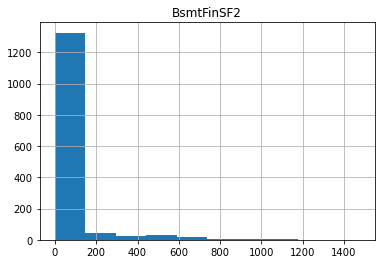

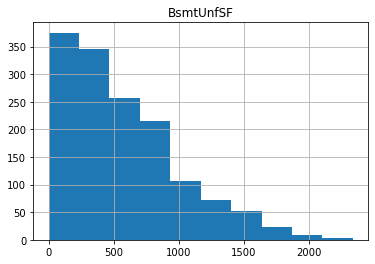

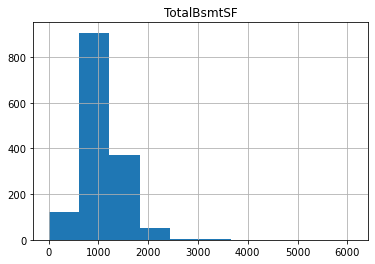

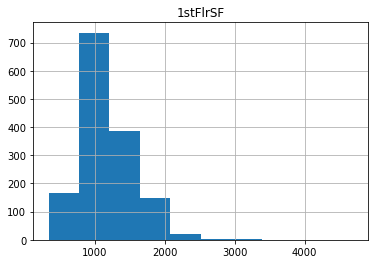

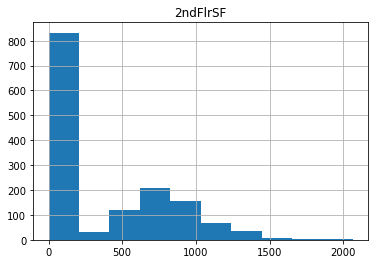

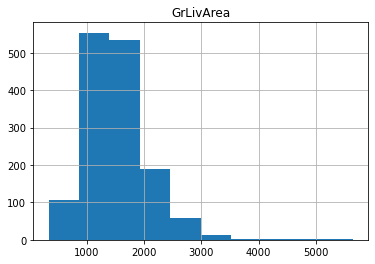

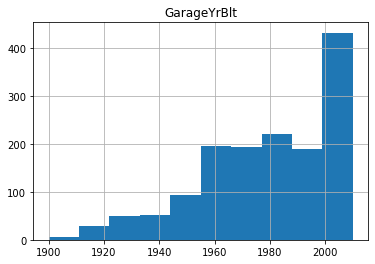

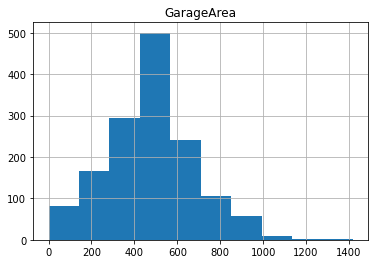

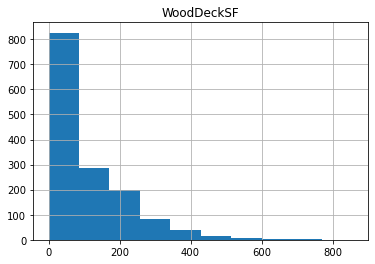

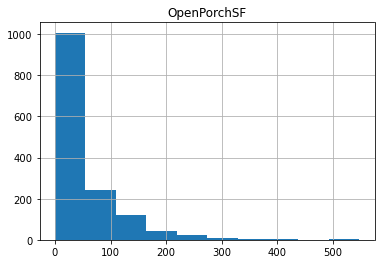

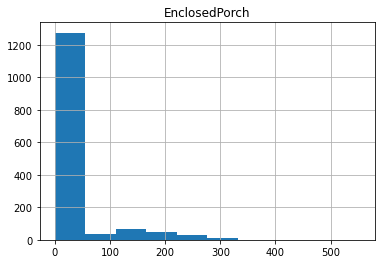

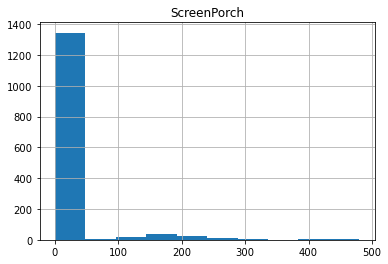

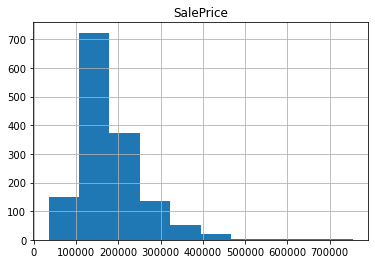

In [19]:
# Analayzing Continues features.
for feature in continues:
    train[feature].hist()
    plt.title(feature)
    plt.show()

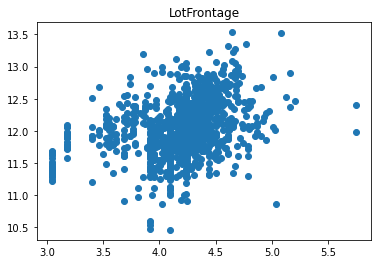

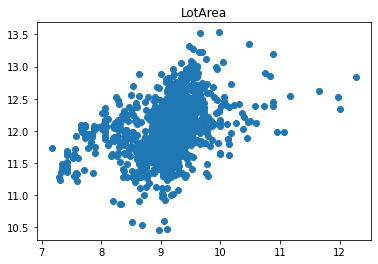

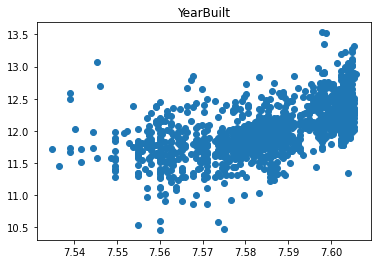

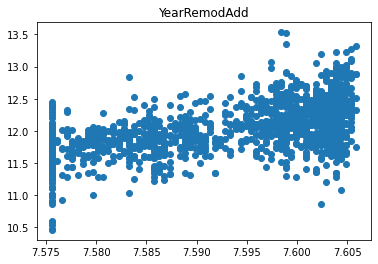

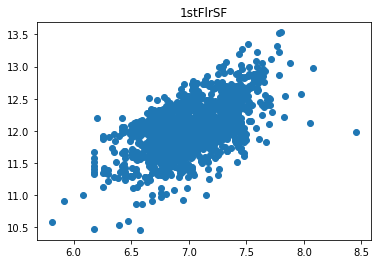

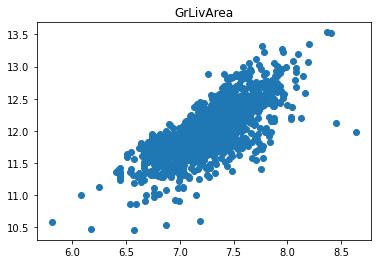

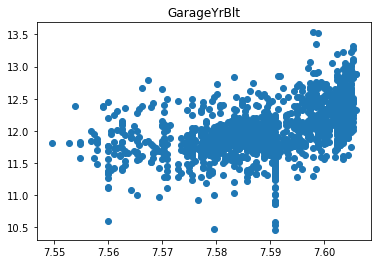

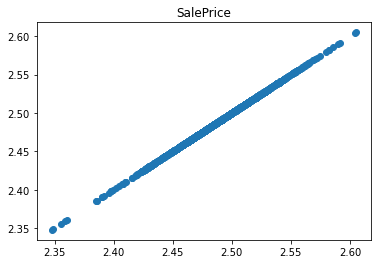

In [23]:
# as we can see apove most of features are not normally distributed, so we need to apply logarithmic transformation
for feature in continues:
    #creating df copy because this is only for analytical purpose, and we will handle it later.
    data= train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["SalePrice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"])
        plt.title(feature)
        plt.show()
        
    


As you can see above, most of the variables are positive correlated with the target variable.

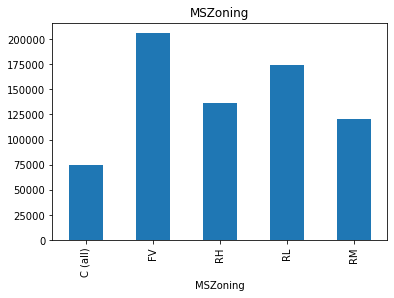

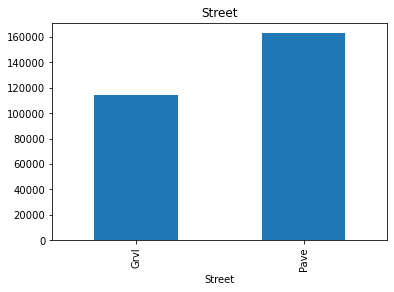

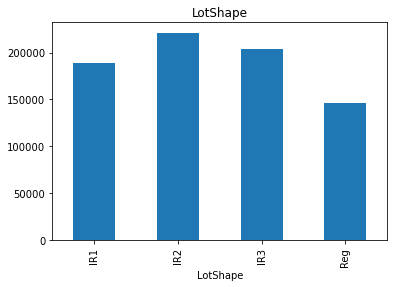

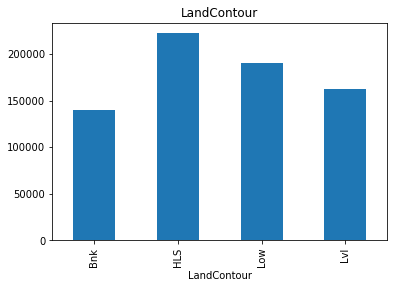

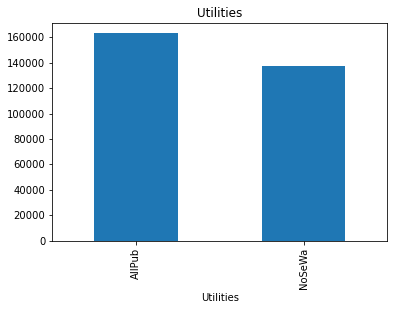

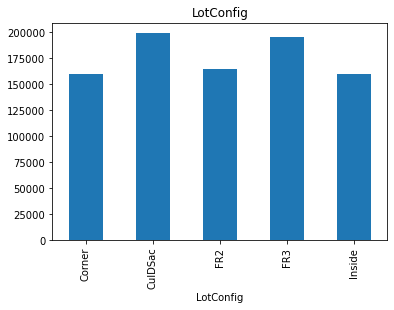

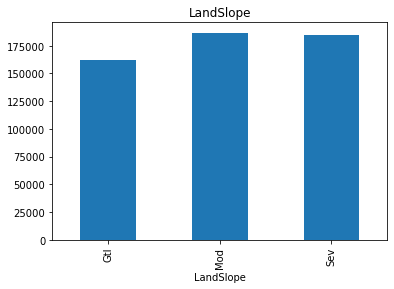

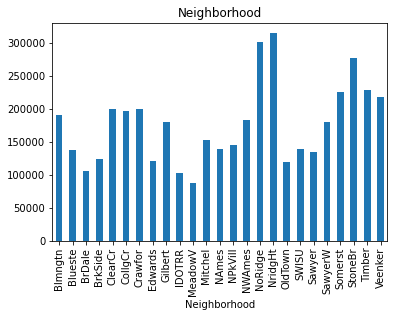

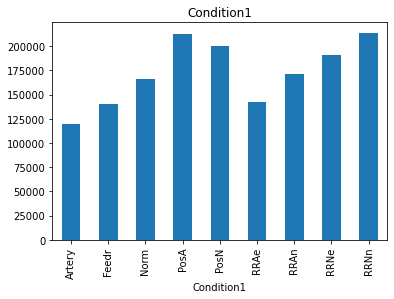

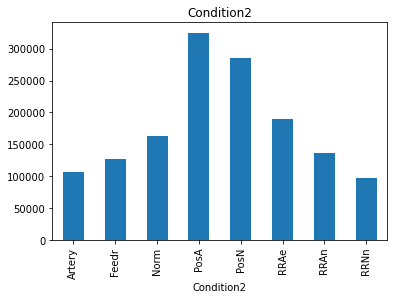

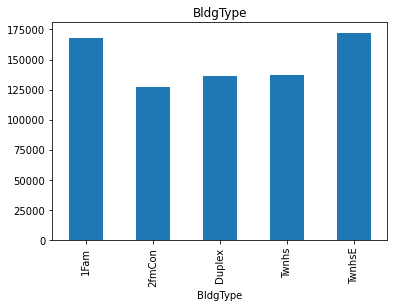

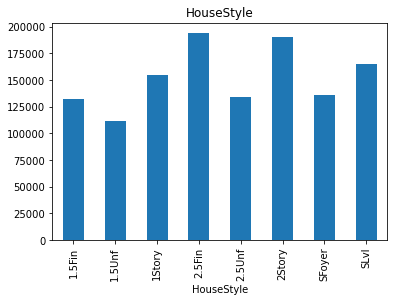

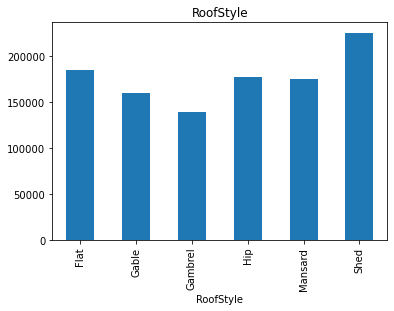

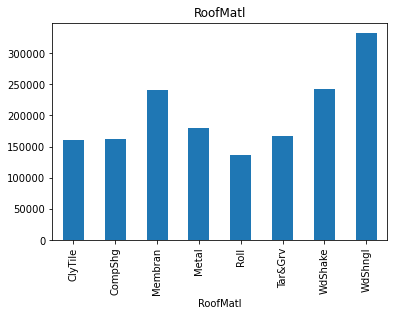

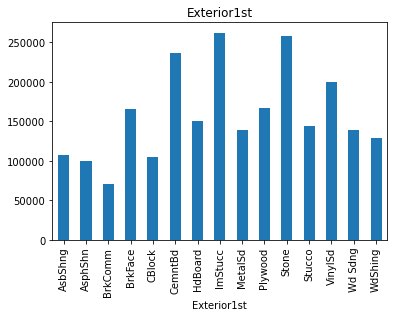

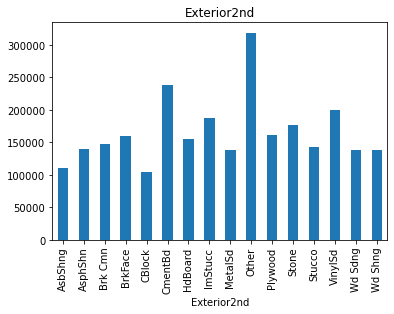

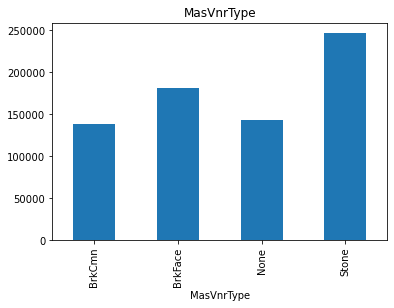

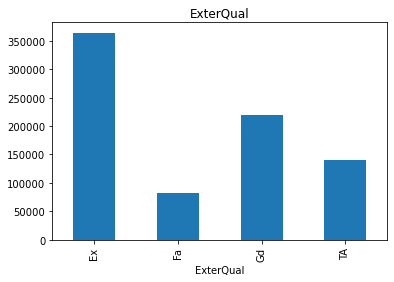

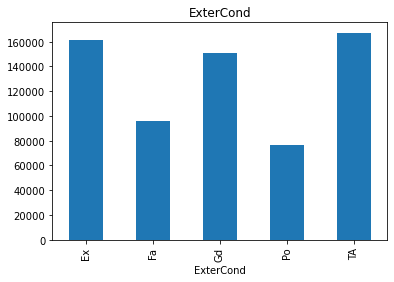

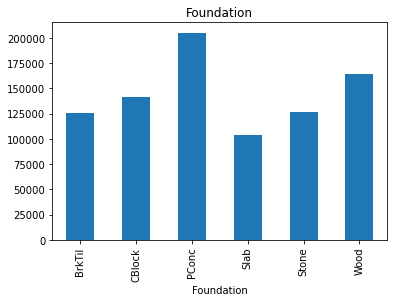

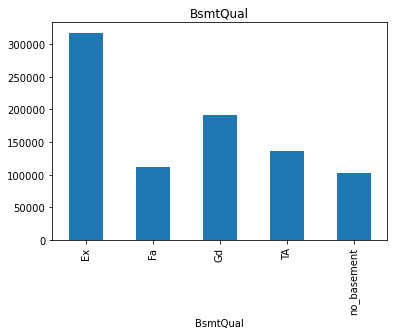

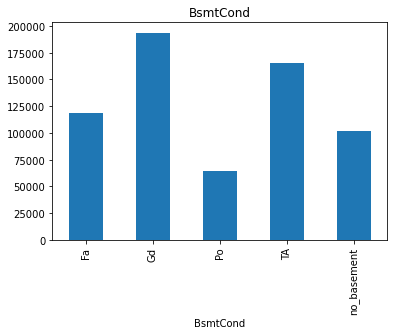

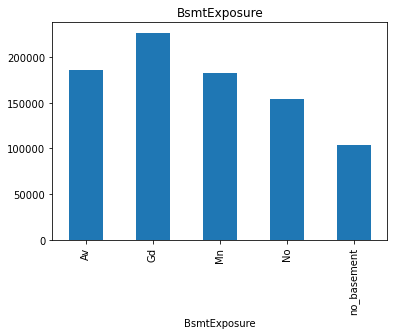

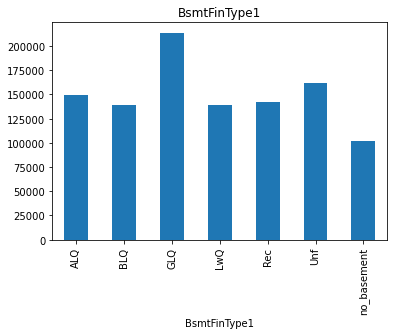

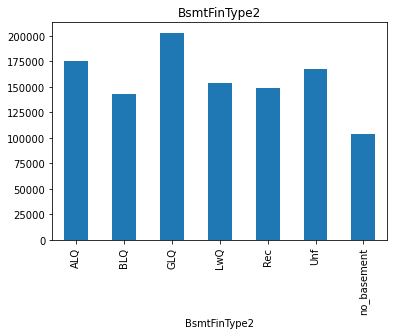

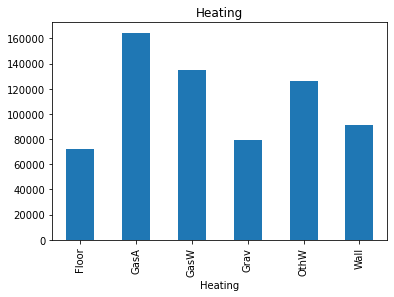

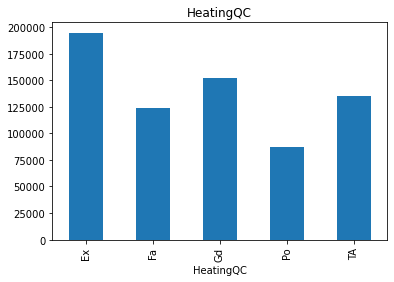

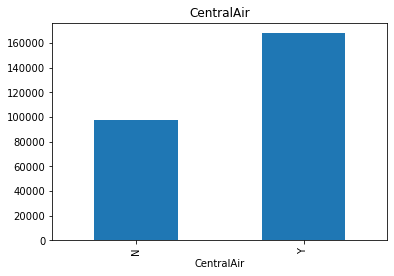

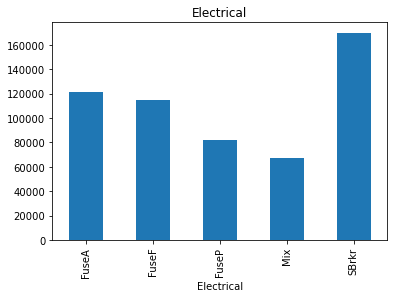

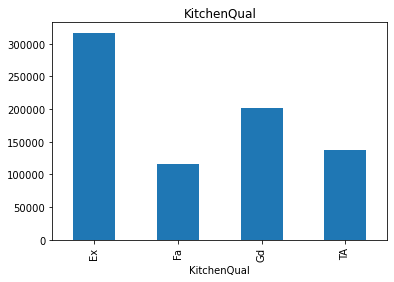

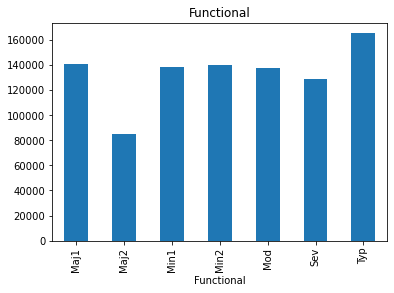

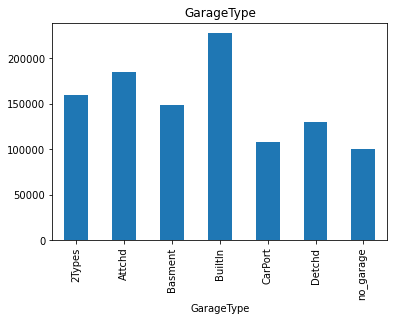

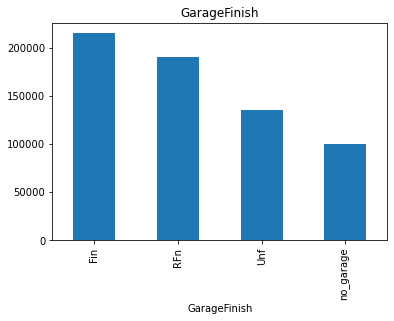

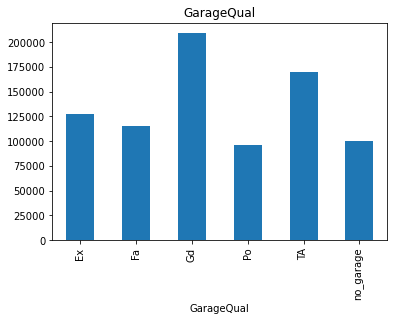

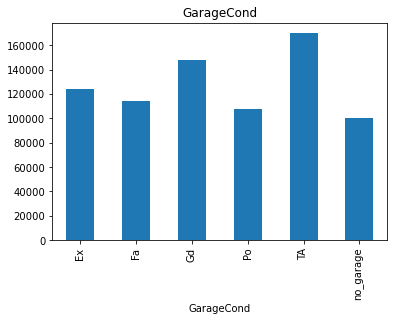

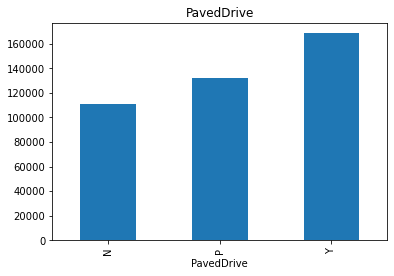

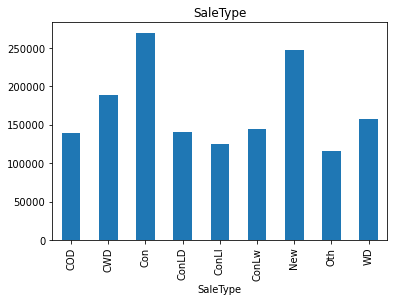

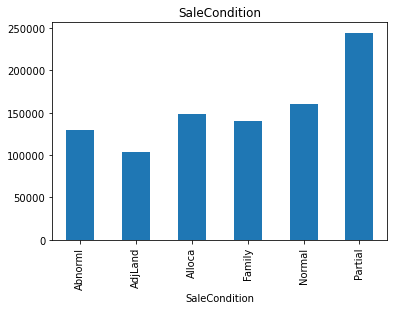

In [24]:
# categorical variables.
for feature in categorical:
    train.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

insights:
1- the houses in floating villages has the highest saleprice.
2- houses with Paved Street have higher saleprices.
3- high irreguilarity shapes made some houses price drops down.
4- Houses in Northridge Heights have the highest saleprices.
5-Family detached houses have higher saleprices than duplex houses.
6- Shed roof style houses have higher Saleprice.
7- houses with stone vaneer have the highest saleprices.
8- partial sale condition make the price higher.




# Check number of categories.

In [4]:
for feature in categorical:
    num_categories = len(train[feature].unique()) 
    print(feature," has {} unique values".format(num_categories))

MSZoning  has 5 unique values
Street  has 2 unique values
LotShape  has 4 unique values
LandContour  has 4 unique values
Utilities  has 2 unique values
LotConfig  has 5 unique values
LandSlope  has 3 unique values
Neighborhood  has 25 unique values
Condition1  has 9 unique values
Condition2  has 8 unique values
BldgType  has 5 unique values
HouseStyle  has 8 unique values
RoofStyle  has 6 unique values
RoofMatl  has 8 unique values
Exterior1st  has 15 unique values
Exterior2nd  has 16 unique values
MasVnrType  has 4 unique values
ExterQual  has 4 unique values
ExterCond  has 5 unique values
Foundation  has 6 unique values
BsmtQual  has 5 unique values
BsmtCond  has 5 unique values
BsmtExposure  has 5 unique values
BsmtFinType1  has 7 unique values
BsmtFinType2  has 7 unique values
Heating  has 6 unique values
HeatingQC  has 5 unique values
CentralAir  has 2 unique values
Electrical  has 5 unique values
KitchenQual  has 4 unique values
Functional  has 7 unique values
GarageType  has 7 u

the features with a lot of categories maybe handled  later 

# Outliers Time!!

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


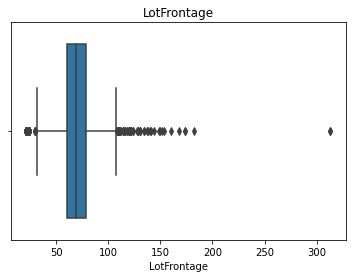

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


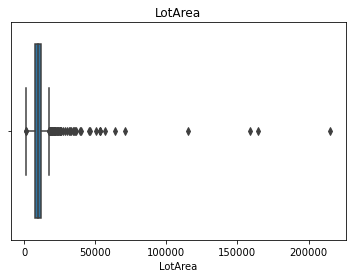

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


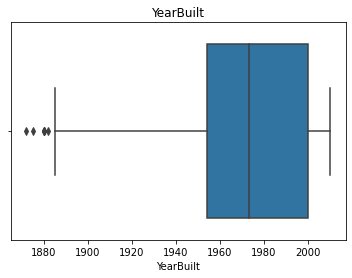

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


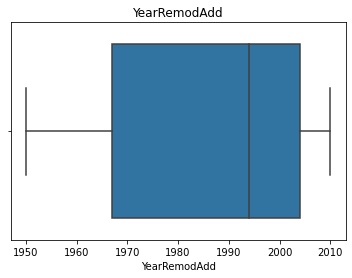

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


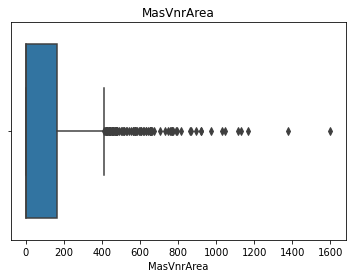

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


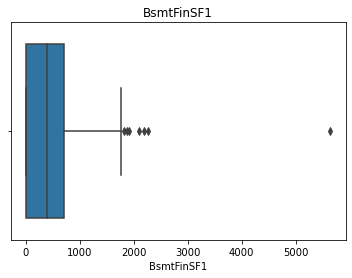

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


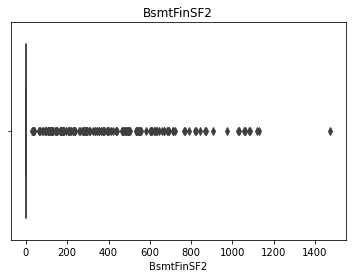

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


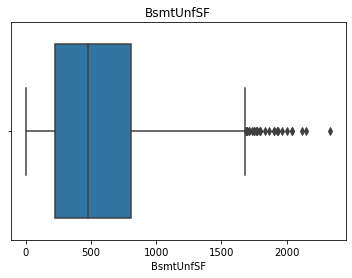

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


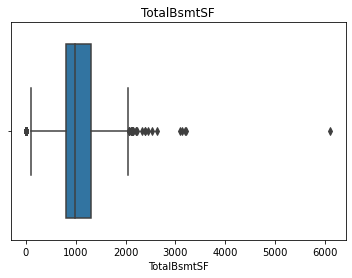

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


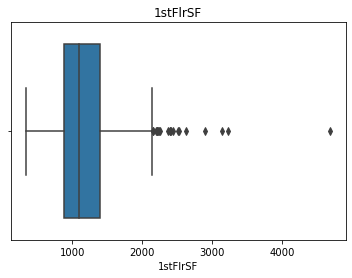

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


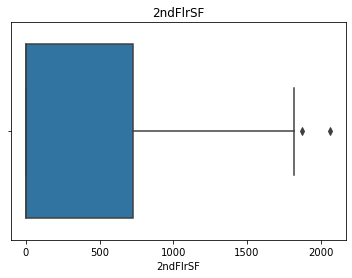

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


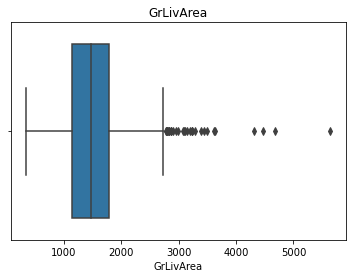

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


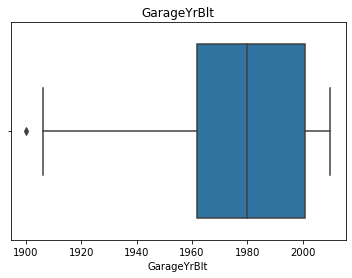

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


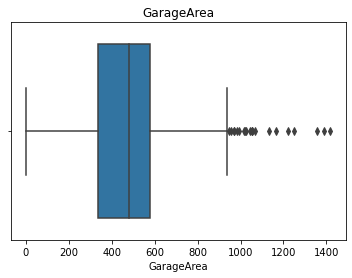

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


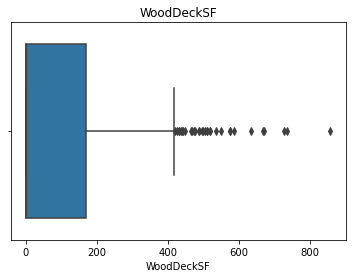

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


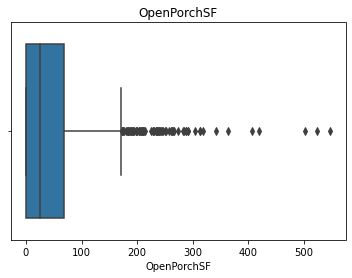

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


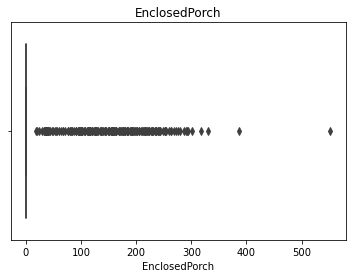

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


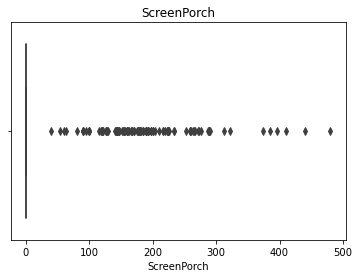

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


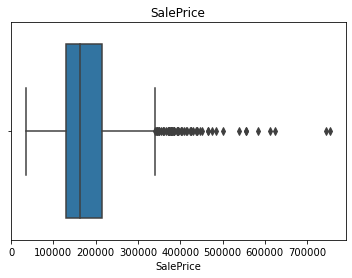

In [7]:
for feature in continues:
    sns.boxplot(train[feature])
    plt.title(feature)
    plt.show()

# Another way to check outilers.

In [14]:
for feature in continues:
    out = train[feature].kurtosis() > 3
    print(feature,out)

LotFrontage True
LotArea True
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
GrLivArea True
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF True
EnclosedPorch True
ScreenPorch True
SalePrice True


In [98]:
# if the kurtosis of feature is > 3, thats mean the feature has outliers.
features_with_outliers = [feature for feature in continues if train[feature].kurtosis() > 3 ]
# This will be handled in feature engineering part.

# Checking for skewness.

In [19]:
# machine learning models and specially regression models, dont love skewness, so we will detect it skewed features and handle it later.
for feature in continues:
    x = train[feature].skew() 
    print(feature, x)

LotFrontage 2.4091466665496006
LotArea 12.207687851233496
YearBuilt -0.613461172488183
YearRemodAdd -0.5035620027004709
MasVnrArea 2.6776164510820997
BsmtFinSF1 1.685503071910789
BsmtFinSF2 4.255261108933303
BsmtUnfSF 0.9202684528039037
TotalBsmtSF 1.5242545490627664
1stFlrSF 1.3767566220336365
2ndFlrSF 0.8130298163023265
GrLivArea 1.3665603560164552
GarageYrBlt -0.6783329490955604
GarageArea 0.17998090674623907
WoodDeckSF 1.5413757571931312
OpenPorchSF 2.3643417403694404
EnclosedPorch 3.08987190371177
ScreenPorch 4.122213743143115
SalePrice 1.8828757597682129


In [99]:
# if the skewness > 1, the feature is positivly skewed, and if the skewness < -1 then the data negatively skewed.
#i will store the skewed data in a list to handle it later.
features_with_skewness = [feature for feature in continues if train[feature].skew() > 1 or train[feature].skew() < -1 and "Year" not in feature and "Yr" not in feature]

# Time for PMFs family visualizations.
Now, I will plot PDFs,CDFs, and PMFs for features, to discover how the data is distributed.

### 1- Continues features

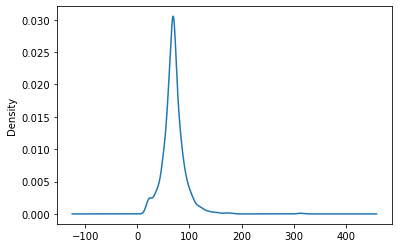

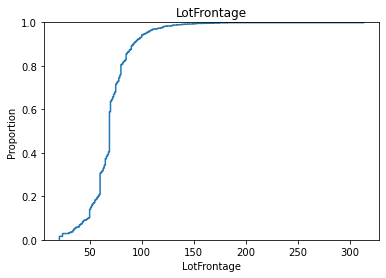

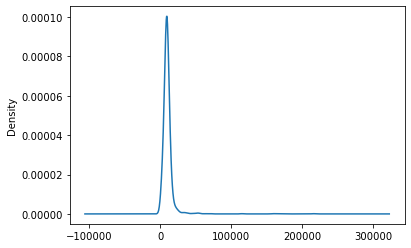

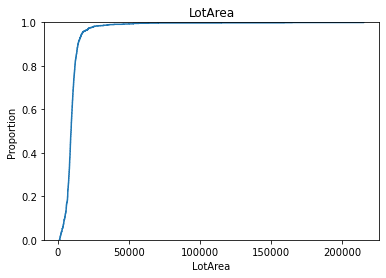

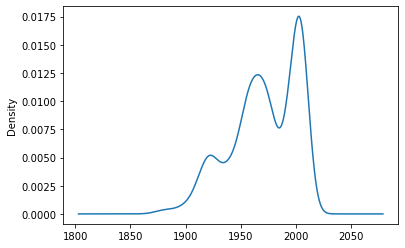

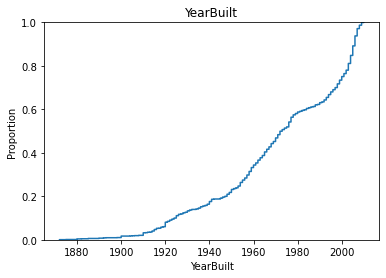

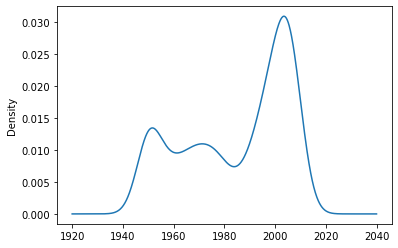

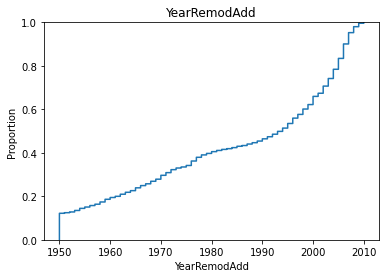

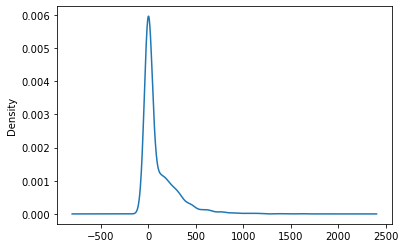

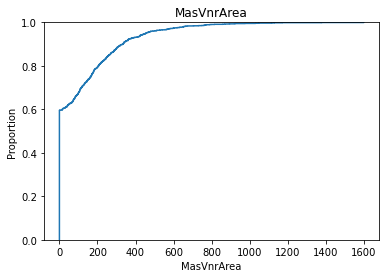

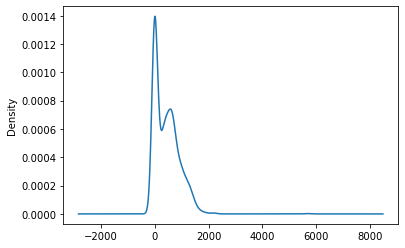

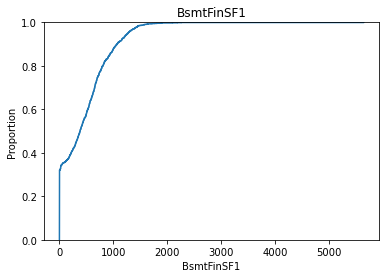

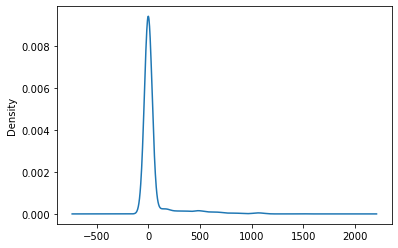

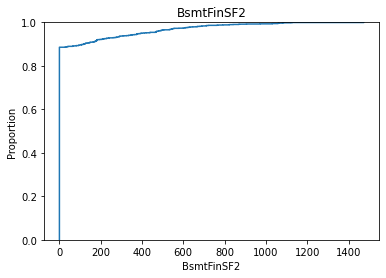

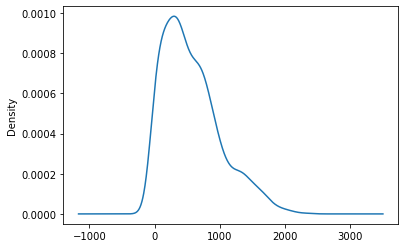

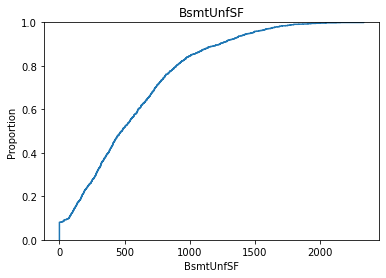

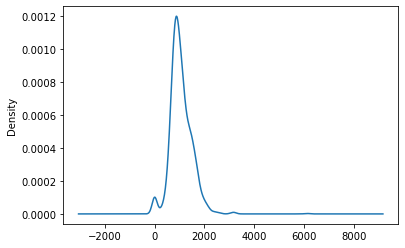

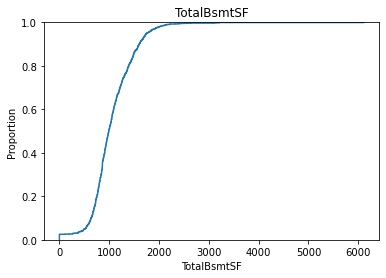

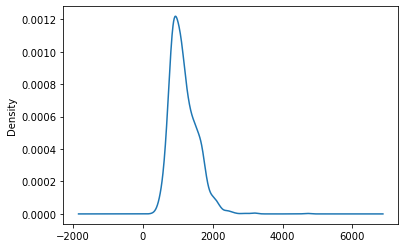

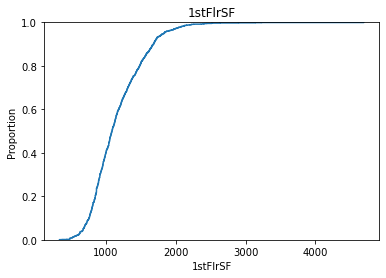

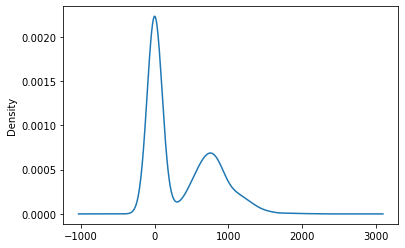

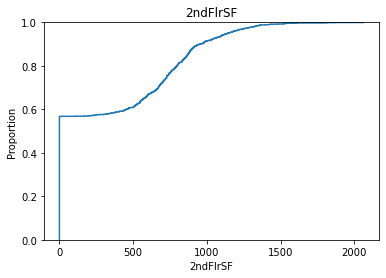

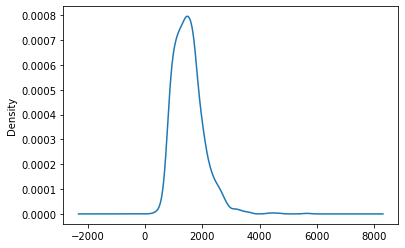

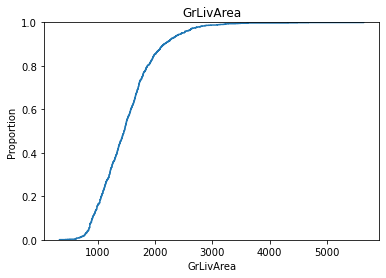

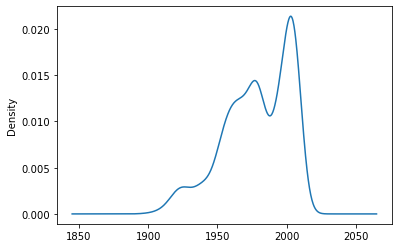

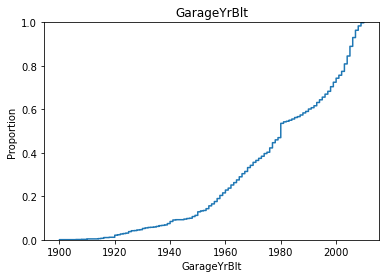

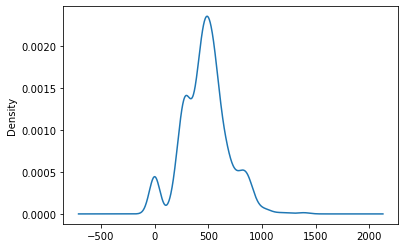

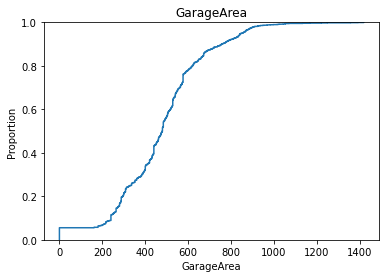

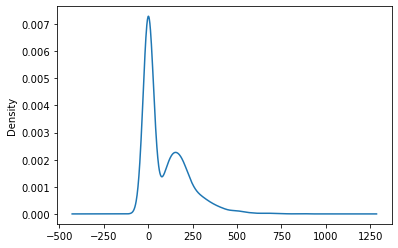

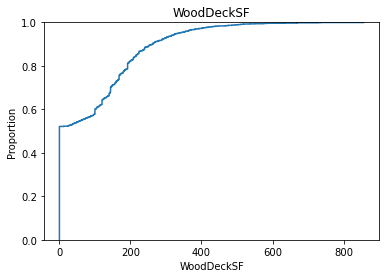

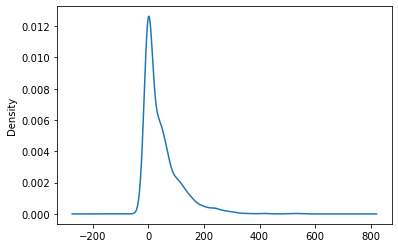

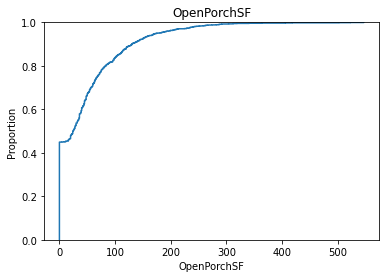

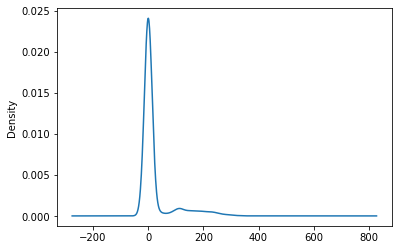

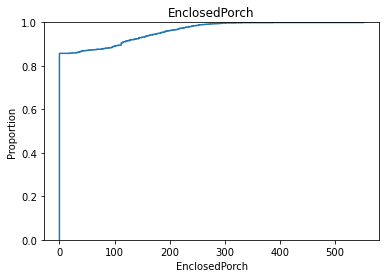

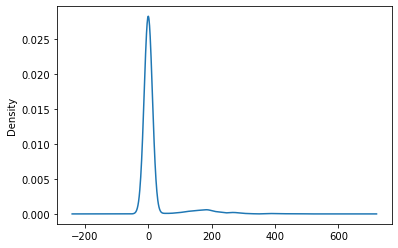

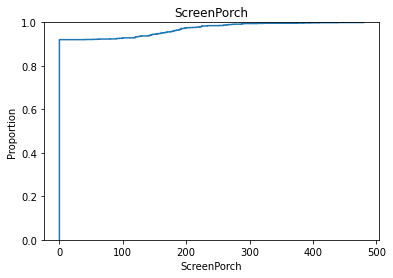

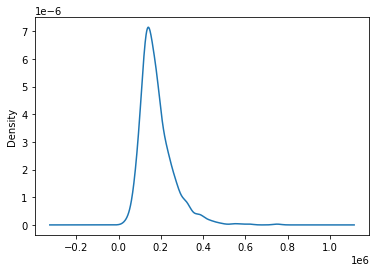

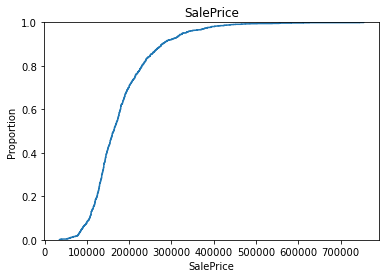

In [8]:
# we use PDFs for continues features.
for feature in continues:
    train[feature].plot(kind="density")
    plt.show()
    sns.ecdfplot(data=train,x=feature)
    plt.title(feature)
    plt.show()

1-LotFrontage values ranges between 0 and 100 
2-Large masvnrarea are not occured a lot in the data
3- most basement are < 2000 Sqft


### Discrete features

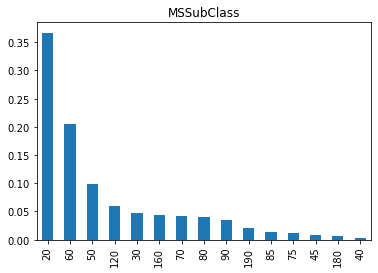

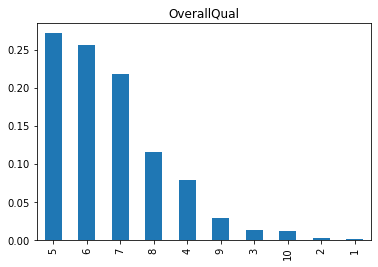

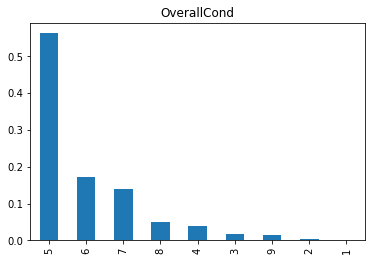

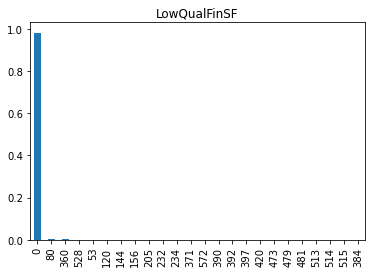

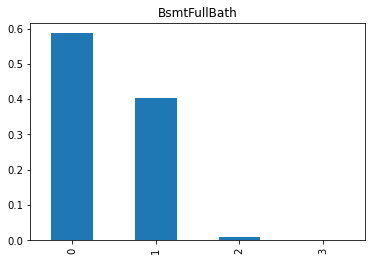

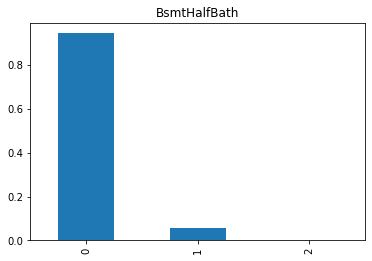

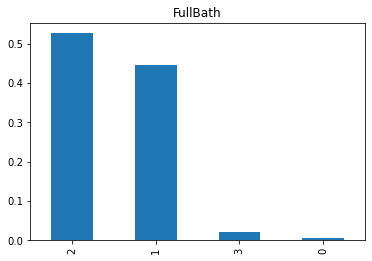

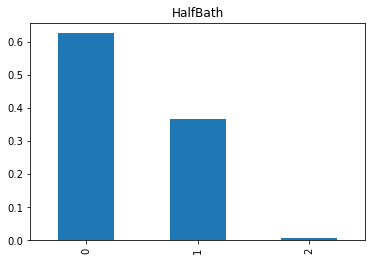

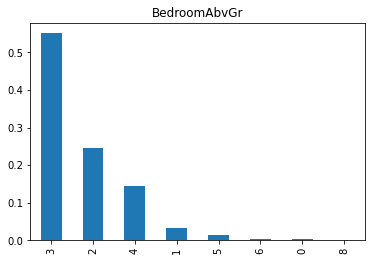

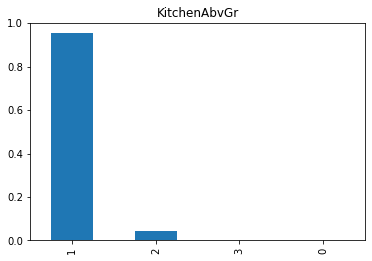

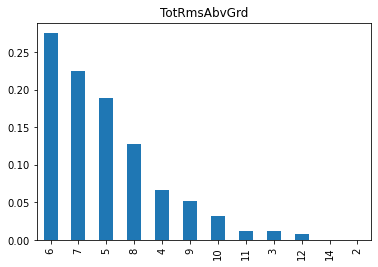

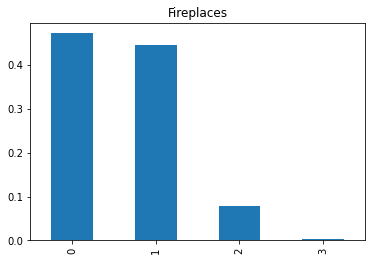

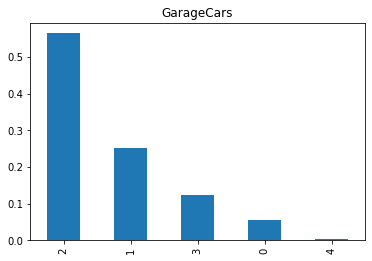

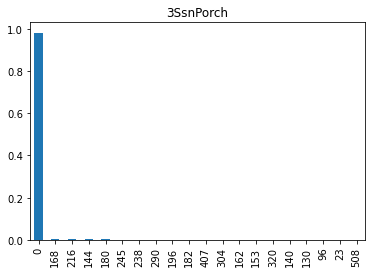

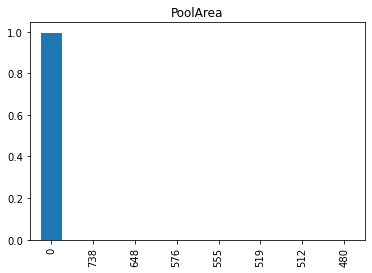

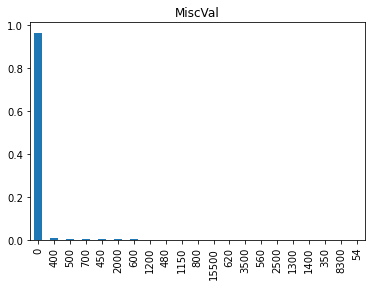

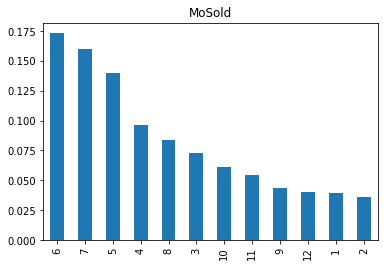

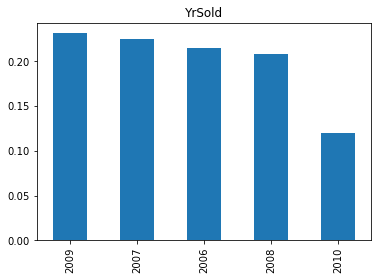

In [9]:
# plot PMFs for discrete variables.
for feature in discrete:
    x= train[feature].value_counts() / len(train[feature])
    x.plot(kind="bar")
    plt.title(feature)
    plt.show()
    

Insights:

1- Most of the houses Have  Average Quality

2-Most of the houses Have  Average condition

# Feature Engineering.

1- Skewness

In [101]:
# for Skewed features I will apply logarithmic transformation, but most of the features there are 0 values so, i will do sqrt transformation.
for feature in features_with_skewness:
    train[feature] = np.round(np.sqrt(train[feature]),2)
        
    

In [104]:
#test data.
features_with_skewness_no_price= ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

for feature in features_with_skewness_no_price:
    test[feature] = np.round(np.sqrt(test[feature]),2)

In [108]:
# Check Again!
print(train[features_with_skewness_no_price].skew())
test[features_with_skewness_no_price].skew()

LotFrontage      0.391988
LotArea          4.139738
MasVnrArea       1.048393
BsmtFinSF1      -0.029920
BsmtFinSF2       3.036800
TotalBsmtSF     -1.274440
1stFlrSF         0.624295
GrLivArea        0.594176
WoodDeckSF       0.486587
OpenPorchSF      0.600908
EnclosedPorch    2.347820
ScreenPorch      3.354793
dtype: float64


LotFrontage     -0.232322
LotArea          0.494080
MasVnrArea       1.077351
BsmtFinSF1      -0.002208
BsmtFinSF2       2.928059
TotalBsmtSF     -1.284444
1stFlrSF         0.583932
GrLivArea        0.516286
WoodDeckSF       0.521197
OpenPorchSF      0.589568
EnclosedPorch    2.259440
ScreenPorch      2.936755
dtype: float64

### Temporal Features.

In [119]:
# Temporal features is year features.
temporal_features = [feature for feature in train.columns if "Year" in feature or "Yr" in feature and "YrSold" not in feature]

In [112]:
# convert every temporal feature to the age of the house.
for feature in temporal_features:
    train[feature] = train["YrSold"] - train[feature]
    test[feature] = test["YrSold"] - test[feature]

In [118]:
train.to_csv("train_liers_corr")
test.to_csv("test_liers_corr")

### outliers

In [124]:
# create function to detect outliers using IQR.
def outliers(df,ft):
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = train.index[(train[feature] < lower_bound) | (train[feature] > upper_bound)]
    return ls

In [125]:
index_list = []
for feature in features_with_outliers:
    index_list.extend(outliers(train,feature))

In [128]:
# Create function for outliers removal.
def remove(df,ls):
    ls = sorted(set(ls))
    data = train.copy()
    data = train.drop(ls)
    return data
    

In [133]:
train = remove(train,index_list)

In [139]:
#Check Again!!
for feature in features_with_outliers:
    print(feature, train[feature].kurtosis())

LotFrontage 0.5445321312476366
LotArea 0.5022308764528929
MasVnrArea -0.6813688286998509
BsmtFinSF1 -1.530007693201294
BsmtFinSF2 0
TotalBsmtSF -0.1547334634844848
1stFlrSF -0.5525163632782455
GrLivArea -0.4555850745925518
OpenPorchSF -0.933606624979765
EnclosedPorch 0
ScreenPorch 0
SalePrice -0.18661536411025015


In [145]:
train.to_csv("train_before scaling.csv")
test.to_csv("test_before scaling.csv")

# Feature Scaling.

In [146]:
numerical_disc_continues = [feature for feature in train.columns if train[feature].dtype != "O" and feature not in "SalePrice" ]

In [144]:
numerical_disc_continues

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[numerical_disc_continues])

MinMaxScaler()

In [148]:
data = train.copy()

In [154]:
train[numerical_disc_continues] = scaler.transform(train[numerical_disc_continues])

In [158]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,RL,0.440000,0.442855,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.039370,0.083333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.448430,Gd,TA,PConc,Gd,TA,No,GLQ,0.645216,Unf,0.0,0.073314,0.418979,GasA,Ex,Y,SBrkr,0.329379,0.598878,0.0,0.607015,0.333333,0.0,0.666667,0.5,0.500000,0.0,Gd,0.555556,Typ,0.000000,Attchd,0.050505,RFn,0.50,0.394245,TA,TA,Y,0.000000,0.409329,0.0,0.000000,0.0,0.0,0.000000,0.090909,0.50,WD,Normal,456.62
1,0.000000,RL,0.635556,0.517569,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.875,0.244094,0.516667,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.759349,Unf,0.0,0.138807,0.633436,GasA,Ex,Y,SBrkr,0.576908,0.000000,0.0,0.433710,0.000000,0.5,0.666667,0.0,0.500000,0.0,TA,0.333333,Typ,0.333333,Attchd,0.313131,RFn,0.50,0.330935,TA,TA,Y,0.639733,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.363636,0.25,WD,Normal,426.03
2,0.235294,RL,0.482222,0.617310,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.055118,0.100000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.407751,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.535454,Unf,0.0,0.212121,0.455635,GasA,Ex,Y,SBrkr,0.371688,0.607293,0.0,0.634067,0.333333,0.0,0.666667,0.5,0.500000,0.0,Gd,0.333333,Typ,0.333333,Attchd,0.070707,RFn,0.50,0.437410,TA,TA,Y,0.000000,0.339623,0.0,0.000000,0.0,0.0,0.000000,0.727273,0.50,WD,Normal,472.76
4,0.235294,RL,0.686667,0.781901,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.777778,0.500,0.062992,0.133333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.599295,Gd,TA,PConc,Gd,TA,Av,GLQ,0.621418,Unf,0.0,0.239492,0.575882,GasA,Ex,Y,SBrkr,0.510478,0.738429,0.0,0.771403,0.333333,0.0,0.666667,0.5,0.666667,0.0,Gd,0.666667,Typ,0.333333,Attchd,0.080808,RFn,0.75,0.601439,TA,TA,Y,0.513714,0.480608,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.50,WD,Normal,500.00
5,0.176471,RL,0.697778,0.774380,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,0.444444,0.500,0.125984,0.233333,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,0.657115,Unf,0.0,0.031281,0.383008,GasA,Ex,Y,SBrkr,0.287861,0.396914,0.0,0.475030,0.333333,0.0,0.333333,0.5,0.166667,0.0,TA,0.222222,Typ,0.000000,Attchd,0.161616,Unf,0.50,0.345324,TA,TA,Y,0.234248,0.287212,0.0,0.629921,0.0,0.0,0.045161,0.818182,0.75,WD,Normal,378.15


## Dealing with rare categories.

In [182]:
# I will convert rare occuring values to Other.
for feature in categorical:
    temp = train.groupby(feature)["SalePrice"].count()/len(train)
    temp_df = temp[temp > 0.05].index
    train[feature] = np.where(train[feature].isin(temp_df),train[feature],"other")
    
    temp = test.groupby(feature)["SaleCondition"].count()/len(test)
    temp_df = temp[temp > 0.05].index
    test[feature] = np.where(test[feature].isin(temp_df),test[feature],"other")

In [24]:
y["MsZoning"]

KeyError: 'MsZoning'

# Dummies for categorical features.

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [200]:
differnt_features = [feature for feature in test.columns if feature not in train.columns and feature not in "SalePrice" ]

In [203]:
test['Condition1_Feedr']

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      1
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      1
84      0
85      0
86      1
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      1
95      0
96      0
97      0
98      0
99      0


In [208]:
data = test.copy()
test = test.drop(differnt_features,axis=1)

In [214]:
test.shape

(1447, 159)

In [222]:
differents = [feature for feature in train.columns if feature not in test.columns and feature not in "SalePrice"]

In [221]:
train = train.drop(differents,axis=1)

In [224]:
test.shape

(1447, 159)

# Feature Selection:


In [230]:
# i will use Lasso for feature selection.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
X_train = train.drop("SalePrice",axis=1)
y_train = train[["SalePrice"]]

In [231]:
sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=10))
sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=10))

In [236]:
sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,

In [237]:
# extract selected features.
selected_features = X_train.columns[(sel_model.get_support())]


print('total_features {}'.format(X_train.shape[1]))
print('Selected features {}'.format(len(selected_features)))


total_features 159
Selected features 126


# Finally, Machine Learning time.

In [5]:
x_train = pd.read_csv("X_train.csv")
y = pd.read_csv("train_ready_selection.csv")

In [8]:
x_train = x_train.drop("Unnamed: 0",axis=1)
y = y.drop("Unnamed: 0",axis=1)

### I feel so overwhelmed I will implement model any way, Sorry.

# Model Selection.

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lin = LinearRegression()
lin.fit(x_train,y_train)


LinearRegression()

In [21]:
test = pd.read_csv("X_test.csv")

In [28]:
y_pred = lin.predict(test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train,pred)

-1.3119112394805612e+20

# Last but not least, this is my first end-to-end data science project, I know that there is a lot of mistakes, but please give me your feedback & notes to help me improve, and wait for my next better project. Thank you

# Mohammed Kashalo